In [1]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 876.6/876.6 kB 16.4 MB/s eta 0:00:00


In [2]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.5 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [3]:
import ultralytics
from ultralytics import YOLO
from IPython.display import Image

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


**IMPORTING CUSTOM DATASET AND YOLO_V11 FROM ROBOFLOW**

In [4]:

from roboflow import Roboflow
rf = Roboflow(api_key="")
project = rf.workspace("roboflow-universe-projects").project("fire-and-smoke-segmentation")
version = project.version(4)
dataset = version.download("yolov11")



loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Fire-and-Smoke-Segmentation-4 in yolov11:: 100%|██████████| 414/414 [00:00<00:00, 9209.79it/s]


In [5]:
dataset.location

'/content/Fire-and-Smoke-Segmentation-4'

**TRAINING THE MODEL ON CUSTOM DATASET**

In [6]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolo11n.pt" epochs=50 imgsz=640

100% 5.35M/5.35M [00:00<00:00, 65.3MB/s]
Ultralytics 8.3.17 🚀 Python-3.10.12 torch-2.4.0+cpu CPU (Intel Xeon 2.00GHz)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/Fire-and-Smoke-Segmentation-4/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, sav

**CHECKING LABELS OF TRAINING BATCHES**

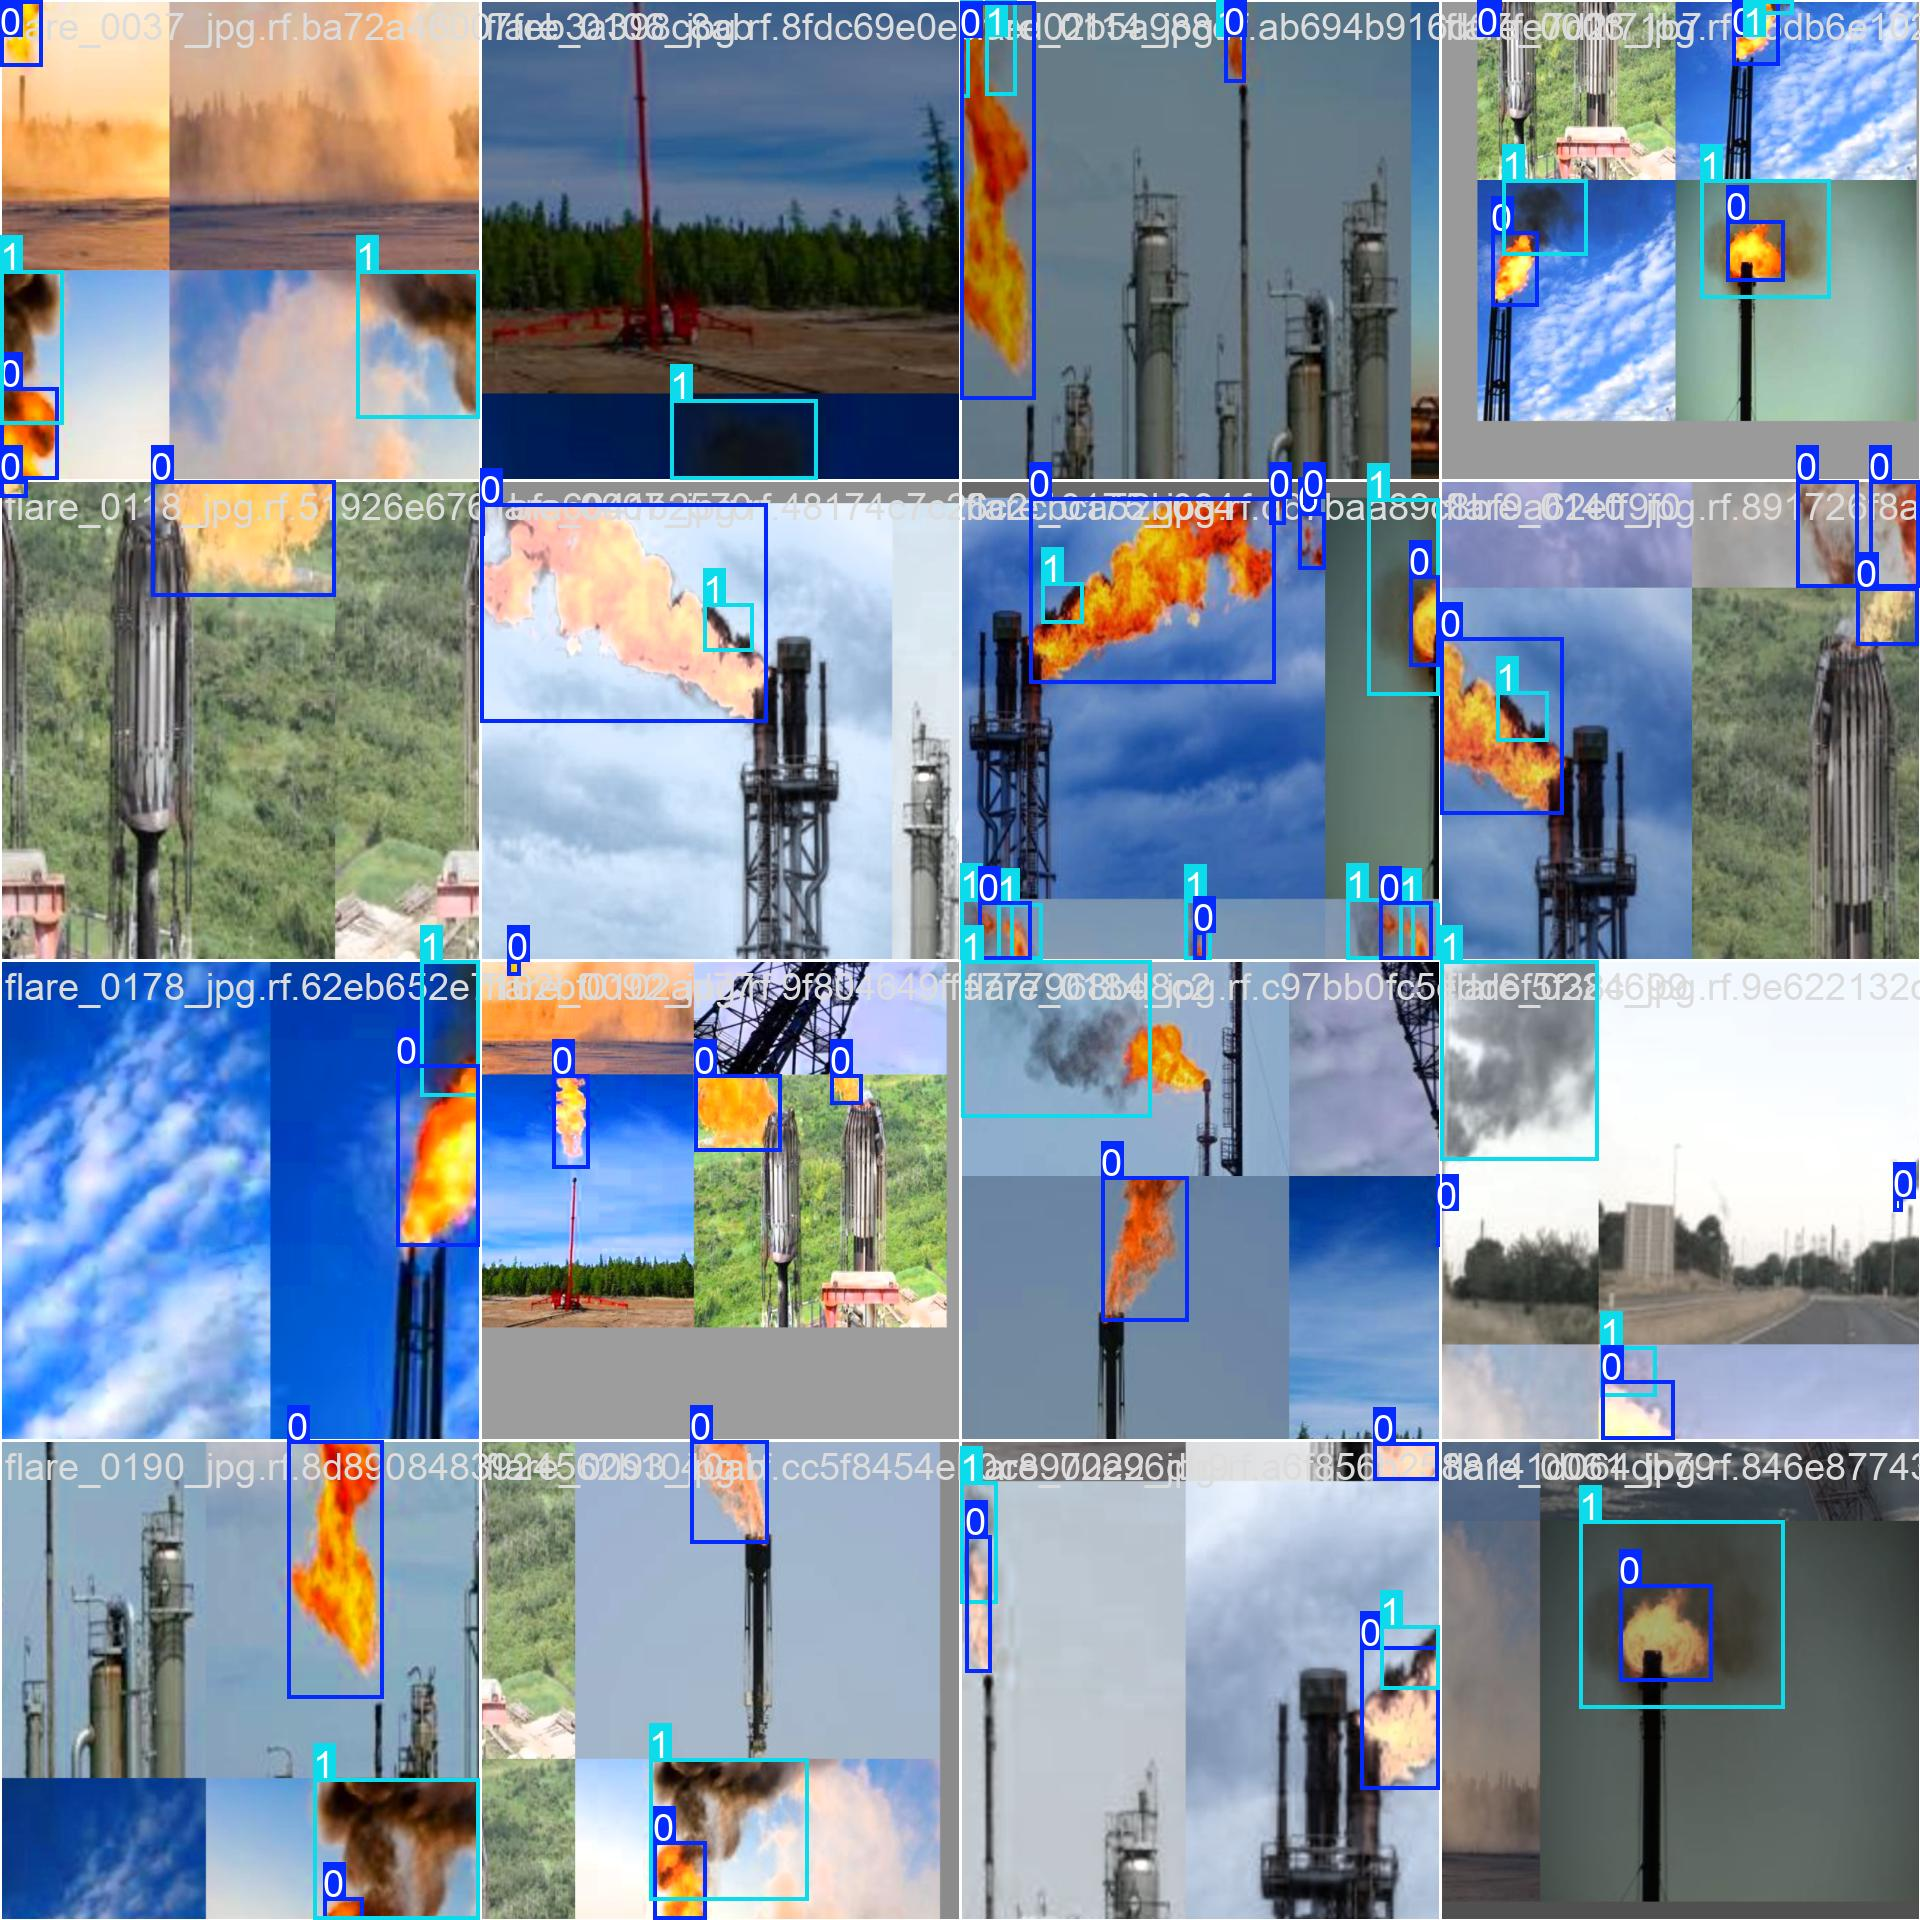

In [7]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'/content/runs/detect/train/train_batch0.jpg', width=600)

**COMPARING THE LABELLED DATA TO THE PREDICTED DATA IN VALIDATION SET**

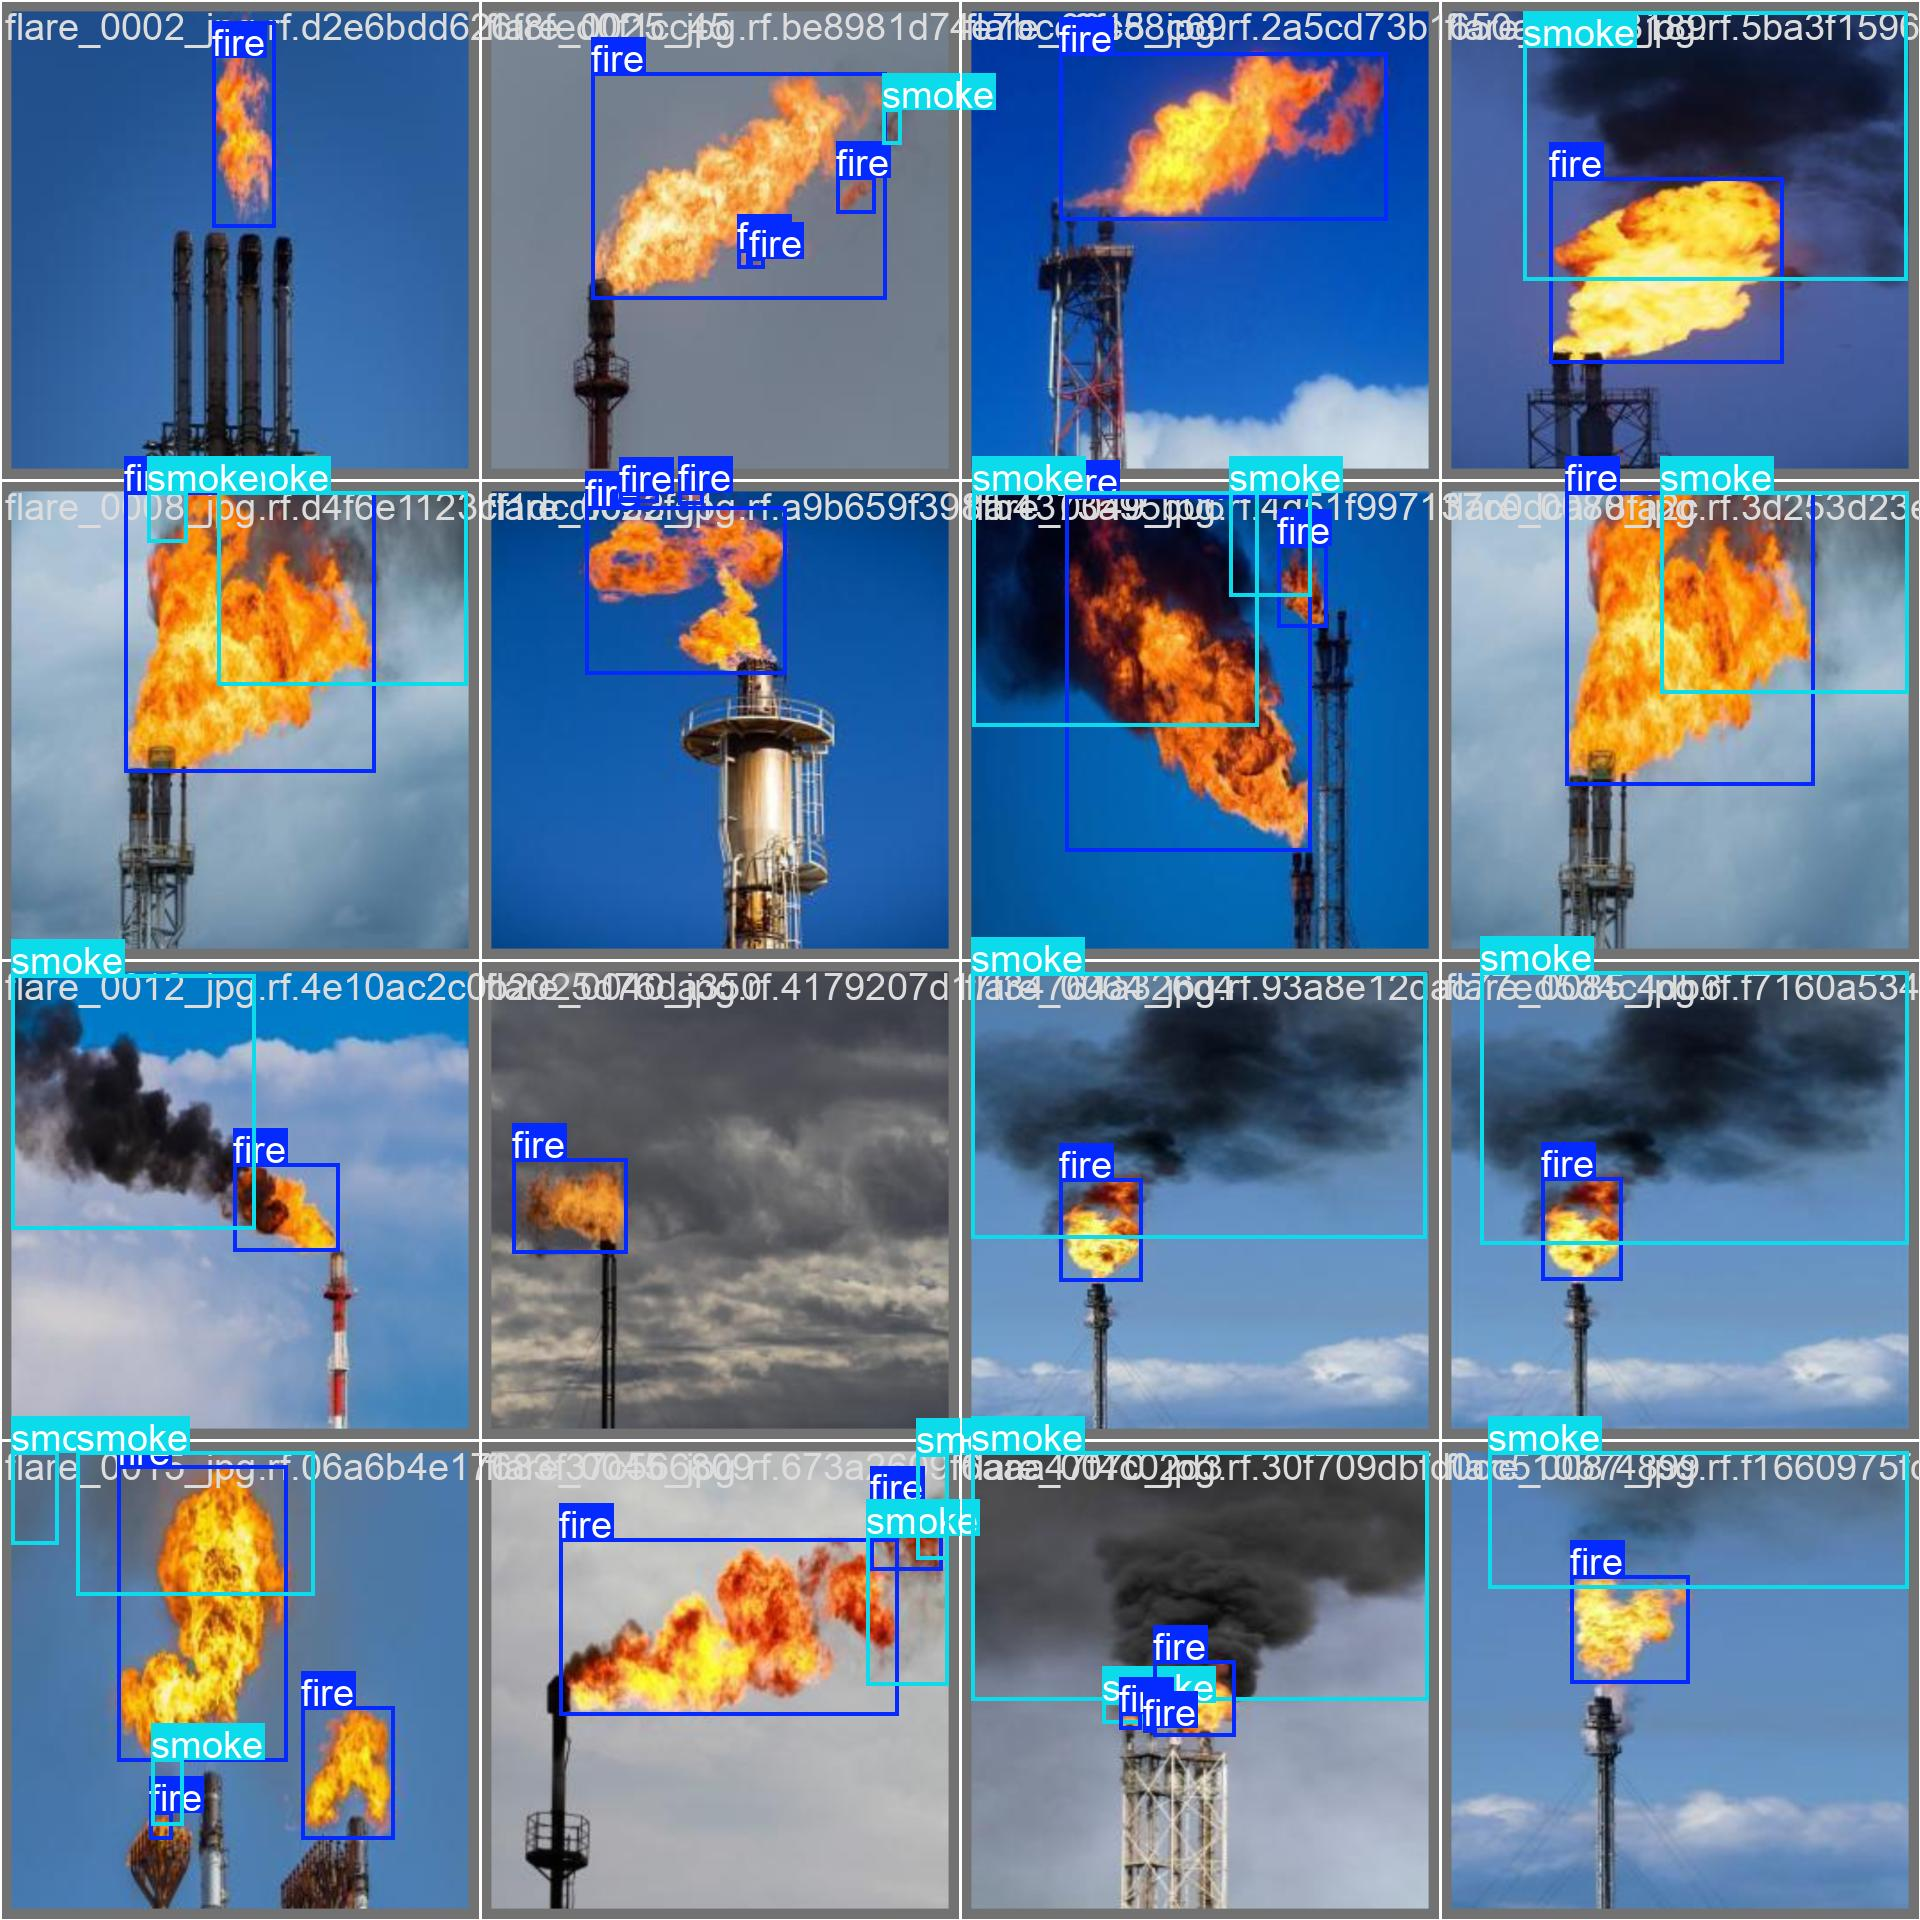

In [ ]:
IPyImage(filename=f'/content/runs/detect/train/val_batch0_labels.jpg', width=600)

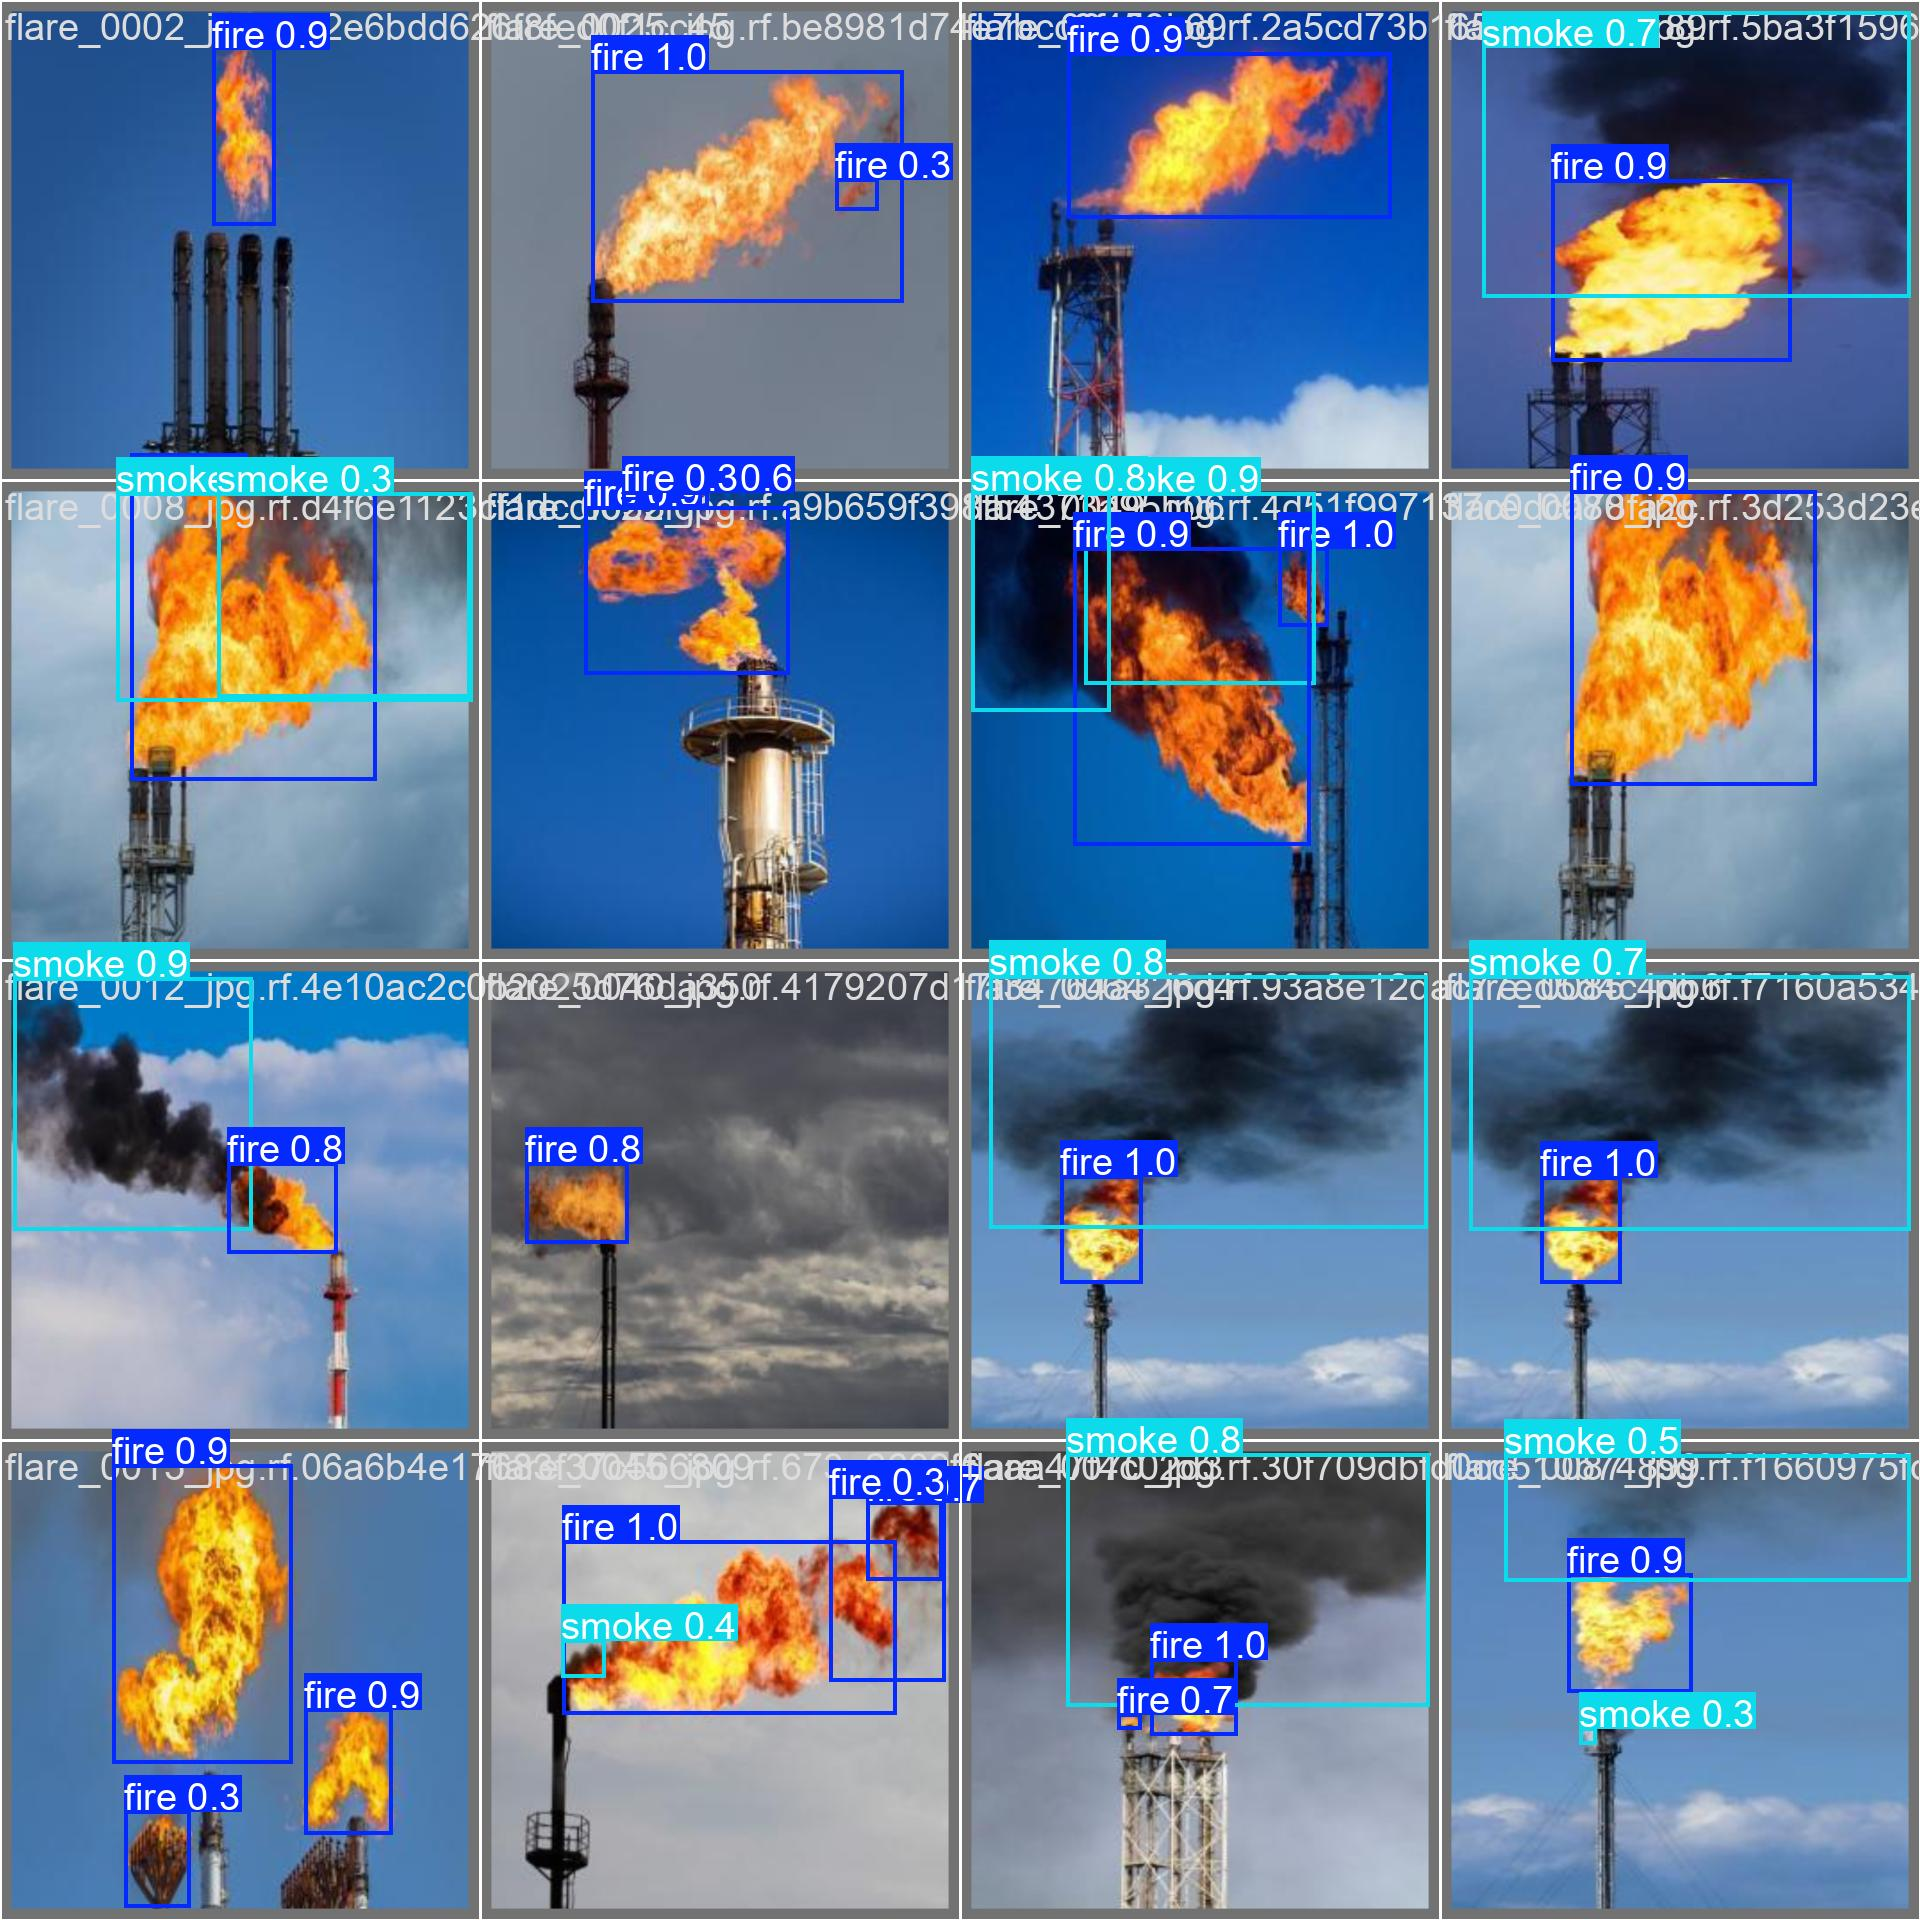

In [ ]:
IPyImage(filename=f'/content/runs/detect/train/val_batch0_pred.jpg', width=600)

**DISPLAYING THE CONFUSION MATRIX OF MODEL**

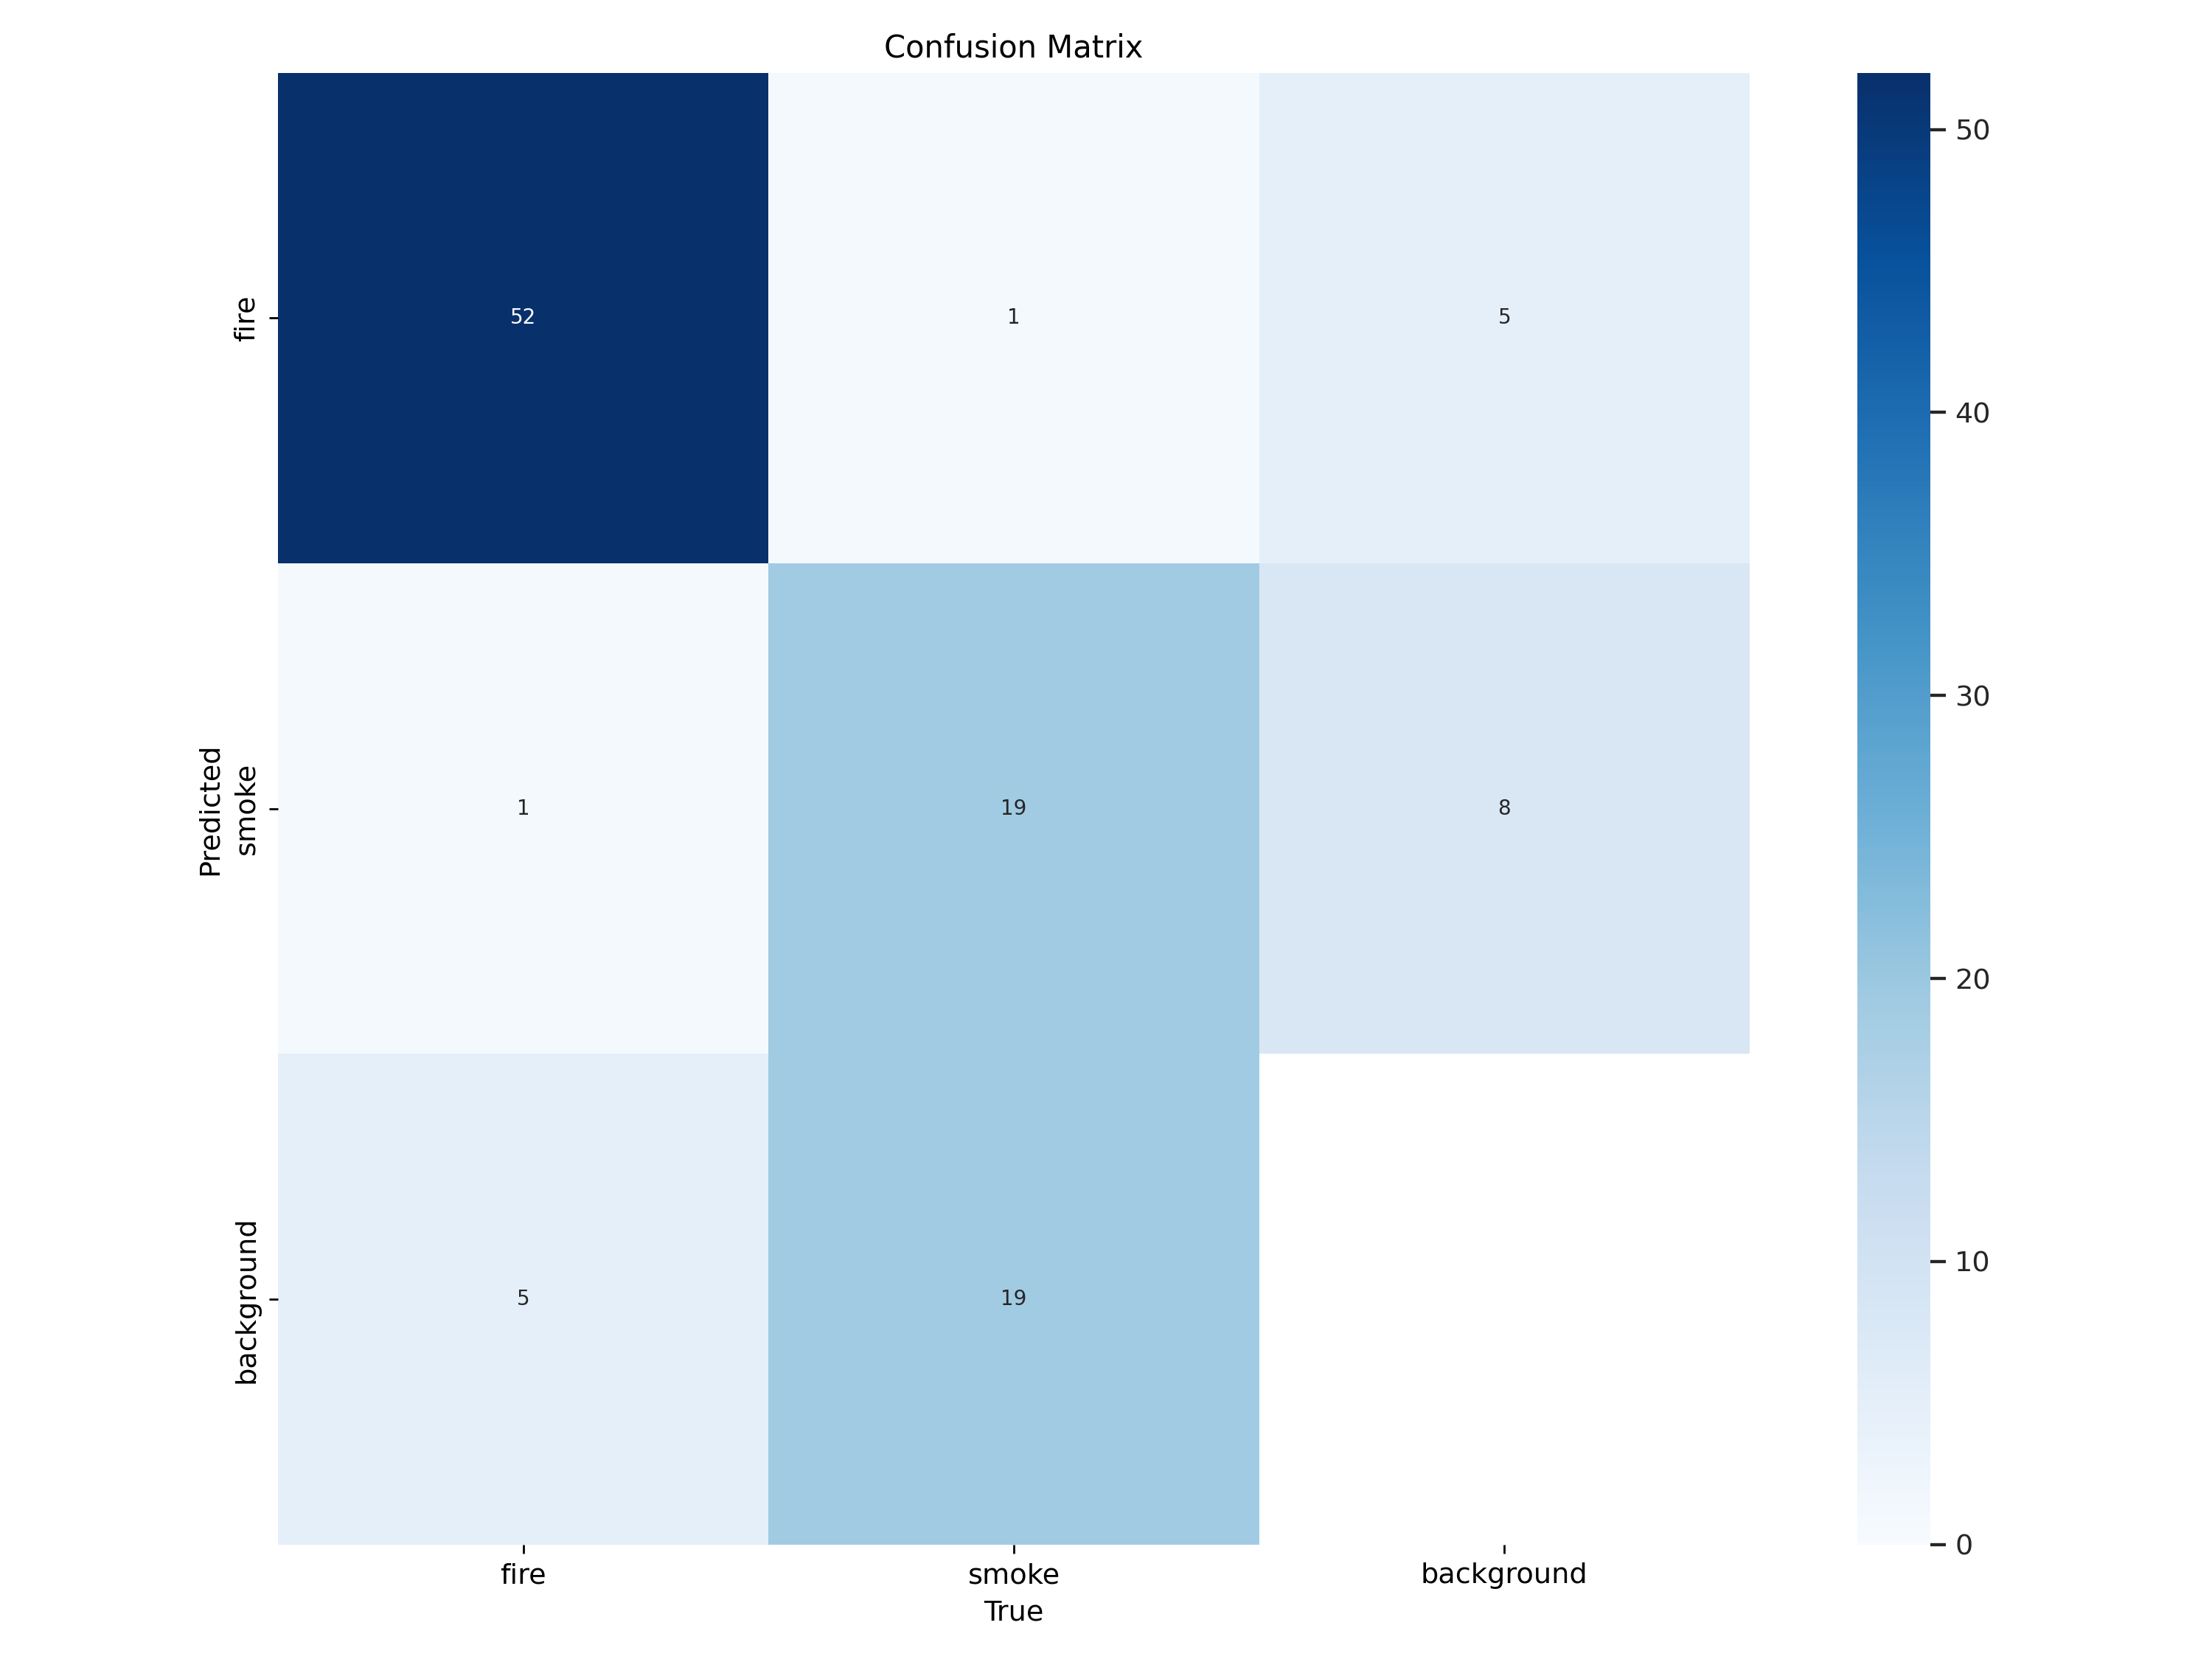

In [21]:
IPyImage(filename=f'/content/runs/detect/train/confusion_matrix.png', width=600)

**USING THE MODEL ON A VIDEO**

In [20]:
!yolo task=detect mode=predict model='/content/runs/detect/train/weights/best.pt' conf=0.25 source='/content/Fire-and-Smoke-Segmentation-4/test/images' save=True

Ultralytics 8.3.17 🚀 Python-3.10.12 torch-2.4.0+cpu CPU (Intel Xeon 2.00GHz)
YOLO11n summary (fused): 238 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs

image 1/20 /content/Fire-and-Smoke-Segmentation-4/test/images/flare_0014_jpg.rf.6ea81b6696f97d0d215876598a4c1ff8.jpg: 640x640 1 fire, 1 smoke, 87.8ms
image 2/20 /content/Fire-and-Smoke-Segmentation-4/test/images/flare_0028_jpg.rf.f27f324c57c833b85df2c84c5289f4da.jpg: 640x640 1 fire, 66.4ms
image 3/20 /content/Fire-and-Smoke-Segmentation-4/test/images/flare_0029_jpg.rf.42a6c6a13dd369e6e7ce4413cd3c6235.jpg: 640x640 1 fire, 1 smoke, 62.5ms
image 4/20 /content/Fire-and-Smoke-Segmentation-4/test/images/flare_0057_jpg.rf.7b26d13c822a35706b3d4ab610da9e70.jpg: 640x640 1 fire, 56.8ms
image 5/20 /content/Fire-and-Smoke-Segmentation-4/test/images/flare_0058_jpg.rf.d523c196faf6d6839608425728cea69c.jpg: 640x640 1 fire, 1 smoke, 55.7ms
image 6/20 /content/Fire-and-Smoke-Segmentation-4/test/images/flare_0059_jpg.rf.7f8f462c357e83594b0671039c4

In [16]:
!yolo task=detect mode=predict model='/content/runs/detect/train/weights/best.pt' conf=0.25 source='/content/stack.gif' save=True

Ultralytics 8.3.17 🚀 Python-3.10.12 torch-2.4.0+cpu CPU (Intel Xeon 2.00GHz)
YOLO11n summary (fused): 238 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs

video 1/1 (frame 1/40) /content/stack.gif: 480x640 1 smoke, 86.8ms
video 1/1 (frame 2/40) /content/stack.gif: 480x640 2 smokes, 53.9ms
video 1/1 (frame 3/40) /content/stack.gif: 480x640 1 smoke, 55.4ms
video 1/1 (frame 4/40) /content/stack.gif: 480x640 1 smoke, 50.4ms
video 1/1 (frame 5/40) /content/stack.gif: 480x640 3 smokes, 55.5ms
video 1/1 (frame 6/40) /content/stack.gif: 480x640 1 smoke, 53.5ms
video 1/1 (frame 7/40) /content/stack.gif: 480x640 1 smoke, 55.7ms
video 1/1 (frame 8/40) /content/stack.gif: 480x640 1 smoke, 51.4ms
video 1/1 (frame 9/40) /content/stack.gif: 480x640 2 smokes, 55.7ms
video 1/1 (frame 10/40) /content/stack.gif: 480x640 1 smoke, 51.1ms
video 1/1 (frame 11/40) /content/stack.gif: 480x640 1 smoke, 54.7ms
video 1/1 (frame 12/40) /content/stack.gif: 480x640 1 smoke, 55.4ms
video 1/1 (frame 13/40) /cont

**DISPLAYING THE RESULTS ON VIDEO**

In [19]:
save_path = '/content/runs/detect/predict3/smoke.avi'
comp_path = '/content/result_comp.mp4'
os.system(f"ffmpeg -i {save_path} -vcodec libx264 {comp_path}")

mp4 = open(comp_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [18]:
from IPython.display import HTML
from base64 import b64encode
import os

save_path = '/content/runs/detect/predict3/stack.avi'
comp_path = '/content/result_comp1.mp4'
os.system(f"ffmpeg -i {save_path} -vcodec libx264 {comp_path}")

mp4 = open(comp_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)